# Predicting Car Prices
The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data_df = pd.read_csv('imports-85.data')

In [3]:
data_df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


The dataset doesn't have headers, so I have to add the header from the [documentation](https://archive.ics.uci.edu/ml/datasets/automobile) and read the file again.

In [4]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
data_df = pd.read_csv('imports-85.data', names=cols)

In [5]:
data_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
numeric_cols =  ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 
                 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [7]:
## in this project I'll only use the numeric features
data_df = data_df[numeric_cols]

In [8]:
data_df.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

In [9]:
data_df=data_df.replace('?', np.nan)
data_df = data_df.astype('float')

In [10]:
data_df.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
## remove rows where the price is null
data_df = data_df.dropna(subset=['price'])

In [12]:
# Replace missing values in other columns using column means.
data_df = data_df.fillna(data_df.mean())

In [13]:
# Confirm that there's no more missing values!
data_df.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Univariate Model

In [14]:
def knn_train_test(column, target, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[column]], train_df[target])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[column]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

In [15]:
rmse_results = {}
train_cols = data_df.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', data_df)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3271.449938
horsepower           4048.437725
curb-weight          4445.141920
highway-mpg          4643.046278
city-mpg             4760.449842
width                4772.459149
length               5428.810101
wheel-base           5460.851458
compression-rate     6610.812153
bore                 6795.388312
normalized-losses    7339.675755
peak-rpm             7649.170564
stroke               7954.301034
height               8073.119759
dtype: float64

In [16]:
def knn_train_test(column, target, df):

    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    # Divide number of rows in half and round.
    middle_index_df = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:middle_index_df]
    test_df = rand_df.iloc[middle_index_df:]
    k_values = [1,3,5,7,9]
    k_rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[column]], train_df[target])
        
        predictions = knn.predict(test_df[[column]])
        
        mse = mean_squared_error(test_df[target], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

In [17]:
rmse_results = {}
train_cols = data_df.columns.drop('price')

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', data_df)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series

bore                 {1: 8602.58848450066, 3: 6984.239489480916, 9:...
city-mpg             {1: 5901.143574354764, 3: 4608.180446380397, 9...
compression-rate     {1: 8087.205346523092, 3: 7375.063685578359, 9...
curb-weight          {1: 5264.290230758878, 3: 5022.318011757233, 9...
engine-size          {1: 3258.4861059962027, 3: 2951.5259704863593,...
height               {1: 8751.160007407449, 3: 8121.165102604576, 9...
highway-mpg          {1: 6025.594966720739, 3: 4671.390389789466, 9...
horsepower           {1: 4170.054848037801, 3: 4020.105451002961, 9...
length               {1: 4611.990241761035, 3: 5129.672039752984, 9...
normalized-losses    {1: 7836.7752643899685, 3: 7516.084828453897, ...
peak-rpm             {1: 9511.480067750124, 3: 8537.550899973421, 9...
stroke               {1: 9043.351317377035, 3: 7247.307977352132, 9...
wheel-base           {1: 4493.734068810494, 3: 5208.39331165465, 9:...
width                {1: 4559.257297950061, 3: 4595.4858709976525, ...
dtype:

In [18]:
k_rmse_results = {}
train_columns = data_df.columns.drop('price')
for column in train_columns: 
    rmse_val = knn_train_test(column, 'price', data_df)
    k_rmse_results[column]= rmse_val
k_rmse_results    
    

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6795.388311535586,
  7: 6896.559499627726,
  9: 6882.822815090022},
 'city-mpg': {1: 5901.143574354764,
  3: 4608.180446380397,
  5: 4760.44984187731,
  7: 5218.847825621605,
  9: 5446.82446248222},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4445.141920375235,
  7: 4330.608104418053,
  9: 4632.92525121302},
 'engine-size': {1: 3258.4861059962027,
  3: 2951.5259704863593,
  5: 3271.449938331611,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8751.160007407449,
  3: 8121.165102604576,
  5: 8073.1197593196175,
  7: 7693.302663098179,
  9: 7776.396862418894},
 'highway-mpg': {1: 6025.594966720739,
  3: 4671.390389789466,
  5: 4643.046277675214,
  7: 4792.485755925797,
  9: 5227.337381566373},
 'horsepower': {1: 4170.054848037801,
  3: 4020.1054510029

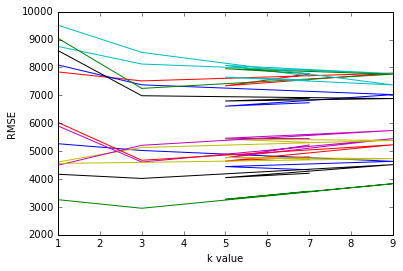

In [19]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

##  Multivariate Model

In [20]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size          3375.274641
horsepower           4191.699237
width                4674.698766
curb-weight          4739.056704
highway-mpg          5071.970954
length               5173.087449
city-mpg             5187.089230
wheel-base           5269.898315
compression-rate     7166.073599
bore                 7232.319720
normalized-losses    7649.281809
stroke               7955.585214
height               8083.028879
peak-rpm             8124.022815
dtype: float64


In [23]:

def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        data_df
    )

k_rmse_results

{'2 best features': {5: 2925.00464591321},
 '3 best features': {5: 2901.007254846714},
 '4 best features': {5: 3864.067381953533},
 '5 best features': {5: 3870.6838798617723},
 '6 best features': {5: 3872.2947119553833}}

## Hyperparameter Tuning

In [24]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        data_df
    )

k_rmse_results

{'2 best features': {1: 2832.6762159757077,
  2: 2592.760534757126,
  3: 2620.327691572396,
  4: 2824.6258095735284,
  5: 2925.00464591321,
  6: 3162.7465130445685,
  7: 3295.7806528253186,
  8: 3580.3376319325566,
  9: 3844.44037715117,
  10: 4066.955641740046,
  11: 4162.831387739917,
  12: 4250.9953344770765,
  13: 4288.279719198008,
  14: 4318.677524353425,
  15: 4384.634184404111,
  16: 4477.339380724929,
  17: 4542.7101905616355,
  18: 4675.594058904271,
  19: 4696.93629950144,
  20: 4684.844437694387,
  21: 4744.078137218994,
  22: 4779.969895724662,
  23: 4826.869687492047,
  24: 4881.349005863175},
 '3 best features': {1: 2861.158731550683,
  2: 2644.428153665928,
  3: 2681.7457878865184,
  4: 2722.280458854013,
  5: 2901.007254846714,
  6: 3079.0995987640463,
  7: 3210.5192759138426,
  8: 3485.8385181559474,
  9: 3782.798641745253,
  10: 4029.356670465123,
  11: 4133.471835231293,
  12: 4225.481801502254,
  13: 4232.577904328598,
  14: 4309.041242789048,
  15: 4357.0171849772

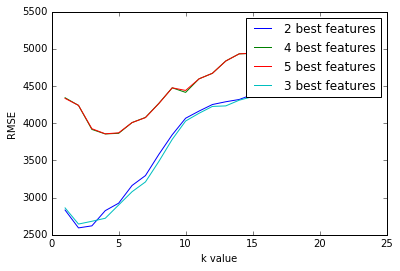

In [25]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()